# Example: Solving a Homegeneous Linear System multiple ways

This is taken from Exercise 4.4.8 from Charnley. We'll solve this problem using multiple approaches.

In [81]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt


Let's look at solving linear systems with numpy first. We'll start with the amino acid example from Charnley's book.


In [82]:
A = np.array([[-0.02,0.02],[0.02,-0.02]])
A

array([[-0.02,  0.02],
       [ 0.02, -0.02]])

First get the eigenvalues and eigenvectors

In [83]:
D,P = np.linalg.eig(A)
D,P

(array([ 0.  , -0.04]),
 array([[ 0.70710678, -0.70710678],
        [ 0.70710678,  0.70710678]]))

Next, set the initial conditions: $y_0$, and compute the inverse of the matrix of eigenvectors so we can project the initial conditions onto the eigenvector space:

In [84]:
y0=np.array([1,0])
Pinv = np.linalg.inv(P)
t = np.linspace(0,50,100)

Next compute the value of the solution for each time in the array of times.

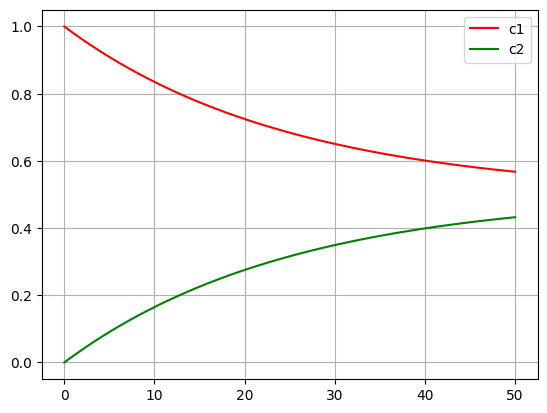

In [85]:
soln = np.array([P@np.diag(np.exp(D*tval))@Pinv@y0 for tval in t]).T
plt.plot(t,soln[0],'r-',label='c1')
plt.plot(t,soln[1],'g-',label='c2')
plt.legend()
plt.grid()

Note that this is a completely numerical computation of the exact solution. It's not an integration of the differential equations and it's accuracy is extremely high. It's also very fast since the accuracy doesn't depend on a small time step size.

In [107]:
r, t, c1, c2 = sp.symbols("r, t, c1, c2", real=True)
tsym=t # save for later
A = sp.Matrix([[-r,r],[r,-r]])
A


Matrix([
[-r,  r],
[ r, -r]])

In [108]:
P,D = A.diagonalize()
P,D

(Matrix([
 [1, -1],
 [1,  1]]),
 Matrix([
 [0,    0],
 [0, -2*r]]))

In [109]:
P*sp.exp(D*t)*sp.Matrix([c1,c2])

Matrix([
[c1 - c2*exp(-2*r*t)],
[c1 + c2*exp(-2*r*t)]])

In [110]:
y0 = sp.Matrix([1,0])

In [111]:
soln = (P*sp.exp(D*t)*P.inv()*y0)
soln

Matrix([
[1/2 + exp(-2*r*t)/2],
[1/2 - exp(-2*r*t)/2]])

In [112]:
soln = soln.applyfunc(sp.simplify)

In [113]:
solns = [soln.subs({r:.02})[i] for i in range(len(soln))]
solns

[1/2 + exp(-0.04*t)/2, 1/2 - exp(-0.04*t)/2]

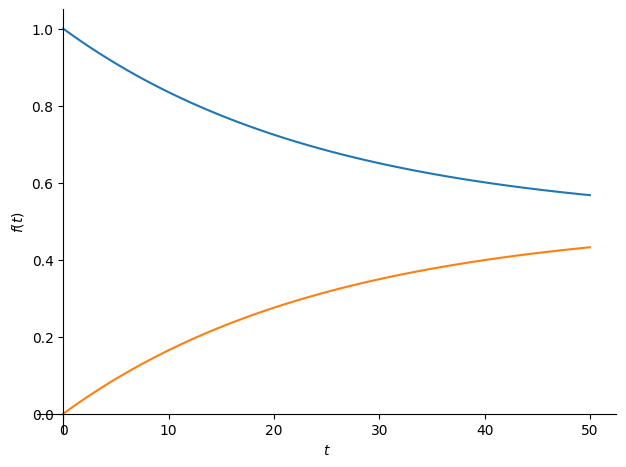

In [114]:
sp.plot(*solns, (t,0,50))

In [115]:
A = np.array([[-0.02,0.02],[0.02,-0.02]])
A

array([[-0.02,  0.02],
       [ 0.02, -0.02]])

In [116]:
y0=np.array([1,0])
y0

array([1, 0])

In [117]:
A@y0

array([-0.02,  0.02])

In [118]:
def f(y,t):
  return A@y

In [119]:
f(y0,0)

array([-0.02,  0.02])

In [120]:
def HeunStep(s, f, t, dt):
  f1 = f(s,t)
  f2 = f(s+f1*dt,t+dt)
  return y+(f1+f2)*dt/2

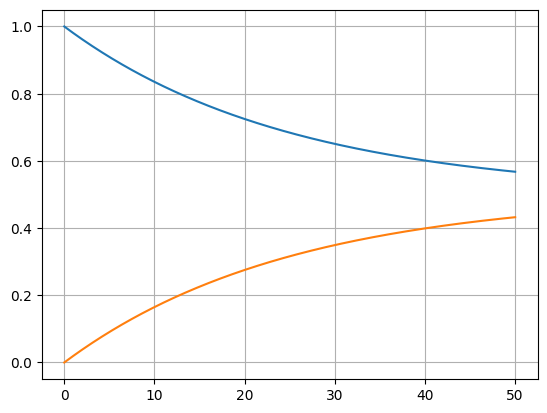

In [121]:
t=0
dt=0.1
y = y0.copy()
ys = [y]
ts = [t]

while t<50:
  y = HeunStep(y, f, t, dt)
  t += dt
  ys.append(y.copy())
  ts.append(t)

ys = np.array(ys).T

plt.plot(ts,ys[0])
plt.plot(ts,ys[1])
plt.grid()

In [122]:
def applyA(A, ymin=0, ymax=1, N=20):
  """
  Apply A to y1 and y2, then normalize arrows for phase plot
  """
  y1domain = np.linspace(ymin,ymax,N)
  y2domain = np.linspace(ymin,ymax,N)

  y1,y2 = np.meshgrid(y1domain, y2domain)

  oldShape = y1.shape
  newShape = (y1.size,)
  y1 = y1.reshape(newShape)
  y2 = y2.reshape(newShape)

  u, v = A@np.array([y1,y2])

  umag = (u**2+v**2)**0.5
  umag = np.where(umag<1e-15,1,umag)
  u = u/umag
  v = v/umag
  return u.reshape(oldShape), v.reshape(oldShape), y1, y2



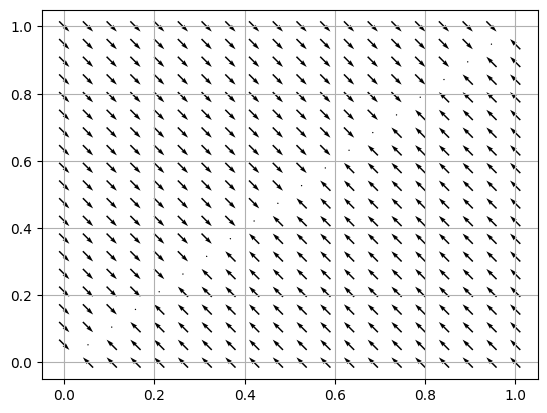

In [123]:
u,v,y1,y2 = applyA(A,ymin=0,ymax=1)
plt.quiver(y1,y2,u,v,pivot='mid')
plt.grid()

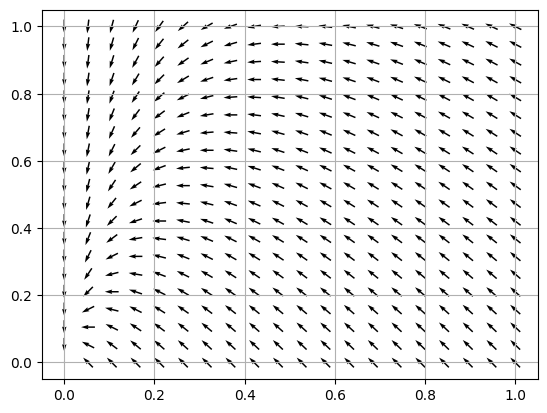

In [124]:
A = np.array([[-2,0],[2,-1]]) # show a phase plot for a different array...
u,v,y1,y2 = applyA(A,ymin=0,ymax=1)
plt.quiver(y1,y2,u,v,pivot='mid')
plt.grid()


<ipython-input-151-d07b0b1b95a4>:1: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(ts,ys[0]/ys[1])


Text(0, 0.5, 'racemization ratio')

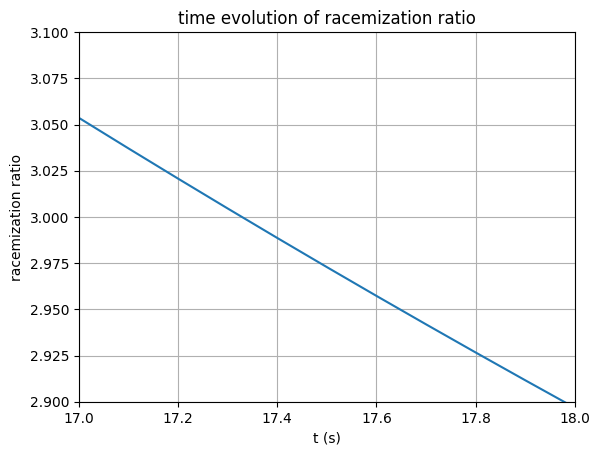

In [151]:
plt.plot(ts,ys[0]/ys[1])
plt.ylim(2.9,3.1)
plt.xlim(17,18)
plt.grid()
plt.title("time evolution of racemization ratio")
plt.xlabel("t (s)")
plt.ylabel("racemization ratio")

In [140]:
solns[0]-3*solns[1]

-1 + 2*exp(-0.04*t)

In [148]:
sp.solve(solns[0]-3*solns[1],tsym)

[17.3286795139986]

In [149]:
25*np.log(2)

17.328679513998633